In [1]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 5236



### data

In [2]:
sas.submitLST(f"""
    data cars;
        set sashelp.cars;
        if strip(model) in ('TSX 4dr', 'TL 4dr', 'MDX') then do;
            msrp = .;
            invoice = .;
            mpg_city = .;
            mpg_highway = .;
        end;
        if strip(model) in ('3.5 RL 4dr') then do;
            type = '';
            origin = '';
        end;
        if msrp > 32762 then expensive = 1;
        else expensive = 0;
        keep model type origin msrp invoice mpg_city mpg_highway expensive;
    run;
              
    proc sort data=cars nodupkey;
        by model;
    run;

    proc print data=cars (obs=5);
    run;
""")

Obs,Model,Type,Origin,MSRP,Invoice,MPG_City,MPG_Highway,expensive
1,3.5 RL 4dr,,,"$43,755","$39,014",18,24,1
2,3.5 RL w/Navigation 4dr,Sedan,Asia,"$46,100","$41,100",18,24,1
3,300M 4dr,Sedan,USA,"$29,865","$27,797",18,27,0
4,300M Special Edition 4dr,Sedan,USA,"$33,295","$30,884",18,27,1
5,325Ci 2dr,Sedan,Europe,"$30,795","$28,245",20,29,0


### axis



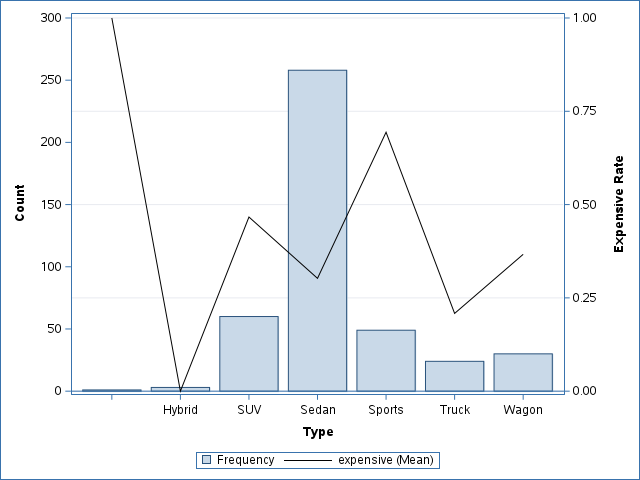

In [14]:
# axis, grid, label, values, type
sas.submitLST(
f"""
proc sgplot data=cars;
    vbar type / missing;
    vline type / response=expensive stat=mean y2axis;
    yaxis label='Count' values=(0 to 300 by 50);
    y2axis grid label='Expensive Rate' values=(0 to 1 by 0.25);
run;
""")

### reflines



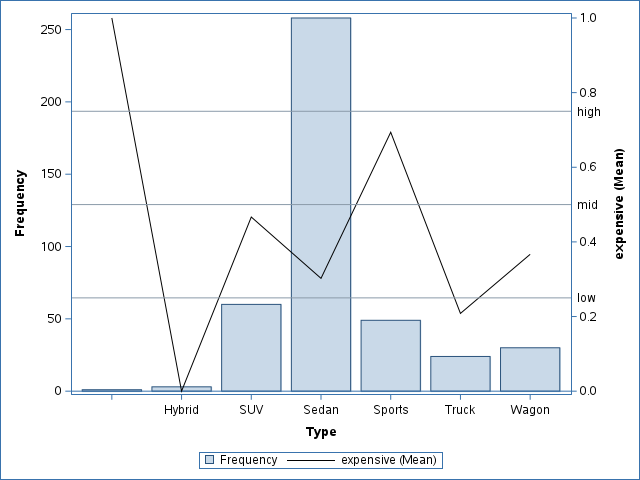

In [20]:
# refline, axis, label
sas.submitLST(
f"""
proc sgplot data=cars;
    vbar type / missing;
    vline type / response=expensive stat=mean y2axis;
    refline 0.25 to 0.75 by 0.25 / axis=y2 label=('low' 'mid' 'high');
run;
""")